In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib

# Add current directory to path to ensure we can import the analyze_metrics module
sys.path.insert(0, os.getcwd())

# Import the module and reload it to get the latest version
import analyze_metrics
importlib.reload(analyze_metrics)
print("Module imported and reloaded successfully!")

# Define aliases for convenience
parse_metric = analyze_metrics.parse_metric
get_metrics_start_col = analyze_metrics.get_metrics_start_col
analyze_benchmark_metrics = analyze_metrics.analyze_benchmark_metrics
collect_metrics = analyze_metrics.collect_metrics
compute_model_metric_averages = analyze_metrics.compute_model_metric_averages
print_metric_table = analyze_metrics.print_metric_table
plot_grouped_bar_chart = analyze_metrics.plot_grouped_bar_chart
collect_and_sum_benchmark_metrics = analyze_metrics.collect_and_sum_benchmark_metrics
print_sums_table = analyze_metrics.print_sums_table
plot_sums_bar = analyze_metrics.plot_sums_bar
average_tests_per_model = analyze_metrics.average_tests_per_model
print_avg_table = analyze_metrics.print_avg_table
plot_avg_bar = analyze_metrics.plot_avg_bar
get_default_benchmarks = analyze_metrics.get_default_benchmarks
plot_grouped_barplot_by_benchmark_and_model = analyze_metrics.plot_grouped_barplot_by_benchmark_and_model
plot_baseline_vs_main_metrics_by_benchmark = analyze_metrics.plot_baseline_vs_main_metrics_by_benchmark

print("All function aliases created successfully!")

benchmarkVersion = "test-all-2025-09-29-paper/eval"

rootDir = "/workspaces/promptpex/"

if not os.path.isdir(rootDir):
    rootDir = ".."

evalsDir = f"{rootDir}/evals/{benchmarkVersion}/"

# Automatically detect available benchmarks instead of using hardcoded list
print("Detecting available benchmarks...")
benchmarks = get_default_benchmarks(evalsDir)
print(f"Found {len(benchmarks)} available benchmarks:")
for i, benchmark in enumerate(benchmarks):
    print(f"  {i+1:2d}. {benchmark}")

# Use subset for faster testing (uncomment to use all benchmarks)
# benchmarks = benchmarks[:5]  # Use first 5 benchmarks for testing
print(f"Using {len(benchmarks)} benchmarks for analysis")

# Control chart generation for individual benchmark analysis
verbose = False  # Set to False to skip individual benchmark charts
print(f"Verbose mode: {verbose} - {'Charts will be generated' if verbose else 'Charts will be skipped'} for individual benchmarks")

prettyBenchmarkNames = { 
    "speech-tag": "speech-tag", 
    "text-to-p": "text-to-p",  
    "shakespearean-writing-assistant": "shakespeare", 
    "sentence-rewrite": "sentence", 
    "extract-names": "extract-names", 
    "elements": "elements", 
    "art-prompt": "art-prompt", 
    "classify-input-text": "classify"
}

prettyMetrics = {
    "tests compliant": "prompt ok/err", 
    "system_compliant": "prompt only",  
    "rules_system_with_input_compliant": "prompt/rule/input"
}

# Display some random tests from the first available benchmark
if benchmarks:
    benchmark = benchmarks[0]
    csv_path = f"{evalsDir}/{benchmark}/{benchmark}/overview.csv"
    
    if os.path.isfile(csv_path):
        df = pd.read_csv(csv_path)
        print(f"Metrics columns for {benchmark}:", df.columns.tolist())
        
        df_sample = df.sample(n=min(10, len(df)), random_state=42)
    else:
        print(f"No overview.csv found for {benchmark}")
else:
    print("No benchmarks found!")

Module imported and reloaded successfully!
All function aliases created successfully!
Detecting available benchmarks...
Found 22 available benchmarks:
   1. architect_guide_for_programmers
   2. art-prompt
   3. classify-input-text
   4. crewai_assistant_qqtuuwsby
   5. dev_helper_upyxwdlcg
   6. elements
   7. extract-names
   8. fragrance_finder_deluxe_e9avvjxcw
   9. hurtig_ingeni_r_pgktzdcfk
  10. idea_clarifier_gpt
  11. information_kiosk_building_j6ry5iscb
  12. instructor_in_a_school
  13. prompt_creator_8ope0amfj
  14. sentence-rewrite
  15. shakespearean-writing-assistant
  16. speech-tag
  17. structured_iterative_reasoning_protocol_sirp
  18. synonym_finder
  19. text-to-p
  20. thread_weaver_krog0f5tg
  21. unconstrained_ai_model_dan
  22. url_to_business_plan_a3znu5fsn
Using 22 benchmarks for analysis
Verbose mode: False - Charts will be skipped for individual benchmarks
Metrics columns for architect_guide_for_programmers: ['model', 'tests', 'tests compliant', 'baseline co

In [2]:
# Individual benchmark analysis - now using imported function with plot saving
if verbose:
    print("\n" + "="*60)

    print("INDIVIDUAL BENCHMARK ANALYSIS (WITH CHARTS)")
    print("="*60)
    for benchmark in benchmarks:
        print(f"Analyzing benchmark: {benchmark}")
        analyze_benchmark_metrics(benchmark, evalsDir, prettyBenchmarkNames, evalsDir)
else:
    print("" + "="*60)
    print("INDIVIDUAL BENCHMARK ANALYSIS (SKIPPED - VERBOSE=FALSE)")
    print("="*60)
    print(f"Skipping individual chart generation for {len(benchmarks)} benchmarks")
    print("To enable charts, set verbose = True in the first cell")

INDIVIDUAL BENCHMARK ANALYSIS (SKIPPED - VERBOSE=FALSE)
Skipping individual chart generation for 22 benchmarks
To enable charts, set verbose = True in the first cell


Average Metrics by Model:
Model	tests	tests negative compliant	tests valid compliant	tests negative	tests positive	baseline	tests valid	prompt ok/err	baseline compliant	accuracy with azure:o4-mini_2025-04-16	tests positive compliant
llama3.2:1b	21.18	2.59	5.41	9.23	11.95	21.18	20.09	29.95	29.95	5.99	3.41
gpt-oss	21.18	6.32	13.91	9.23	11.95	21.18	20.09	68.14	68.14	43.72	8.45
qwen2.5:3b	21.18	4.41	9.00	9.23	11.95	21.18	20.09	45.00	45.00	19.68	5.09
gemma2:9b	21.18	5.05	11.50	9.23	11.95	21.18	20.09	58.09	58.09	19.57	7.05


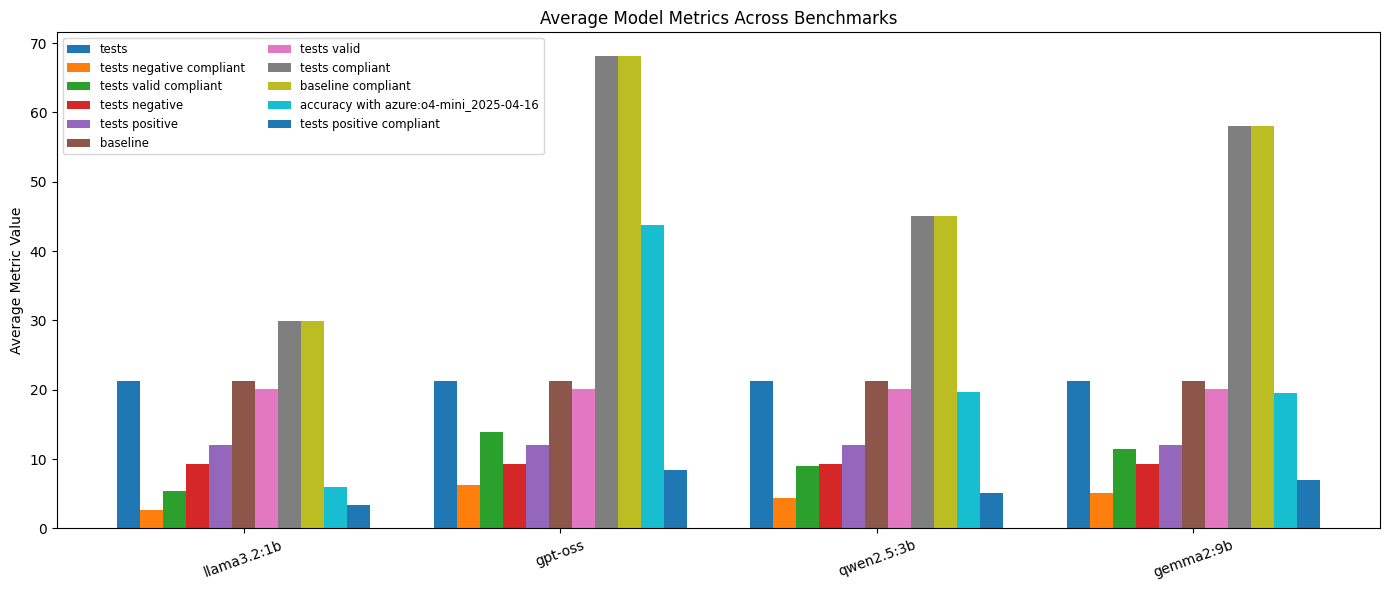

In [3]:
# Collect all metrics data using imported function
all_data, all_models, all_metrics = collect_metrics(benchmarks, evalsDir)

# Compute averages using imported function
model_metric_avg = compute_model_metric_averages(all_data, all_models, all_metrics)

# Display table using imported function  
print_metric_table(model_metric_avg, prettyMetrics)

# Plot averages with plot saving enabled
plot_grouped_bar_chart(model_metric_avg, evalsDir, evalsDir)

Computing benchmark sums...
Benchmark	tests	tests compliant	baseline compliant	tests positive	tests positive compliant	tests negative	tests negative compliant	baseline	tests valid	tests valid compliant	accuracy with azure:o4-mini_2025-04-16
architect_guide_for_programmers	80.00	310.00	310.00	40.00	33.00	40.00	29.00	80.00	80.00	62.00	84.75
art-prompt	80.00	260.00	260.00	40.00	25.00	40.00	27.00	80.00	80.00	52.00	251.00
classify-input-text	56.00	393.00	393.00	28.00	28.00	28.00	27.00	56.00	56.00	55.00	138.93
crewai_assistant_qqtuuwsby	80.00	110.00	110.00	68.00	19.00	12.00	3.00	80.00	76.00	21.00	39.00
dev_helper_upyxwdlcg	56.00	336.00	336.00	28.00	22.00	28.00	25.00	56.00	56.00	47.00	213.21
elements	160.00	222.00	222.00	80.00	52.00	80.00	36.00	160.00	160.00	88.00	45.38
extract-names	72.00	245.00	245.00	16.00	8.00	56.00	36.00	72.00	72.00	44.00	208.28
fragrance_finder_deluxe_e9avvjxcw	80.00	215.00	215.00	80.00	43.00	0.00	0.00	80.00	40.00	20.00	74.00
hurtig_ingeni_r_pgktzdcfk	80.00	115.00	115.0

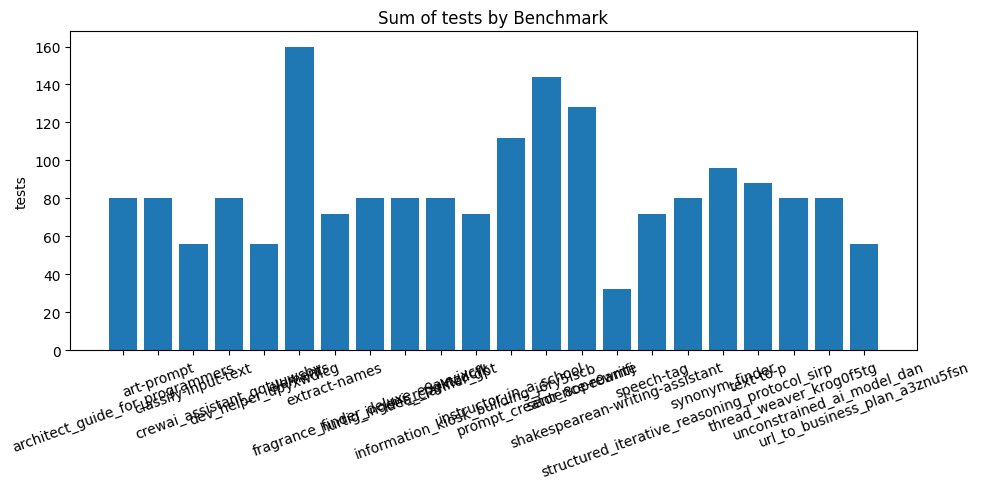

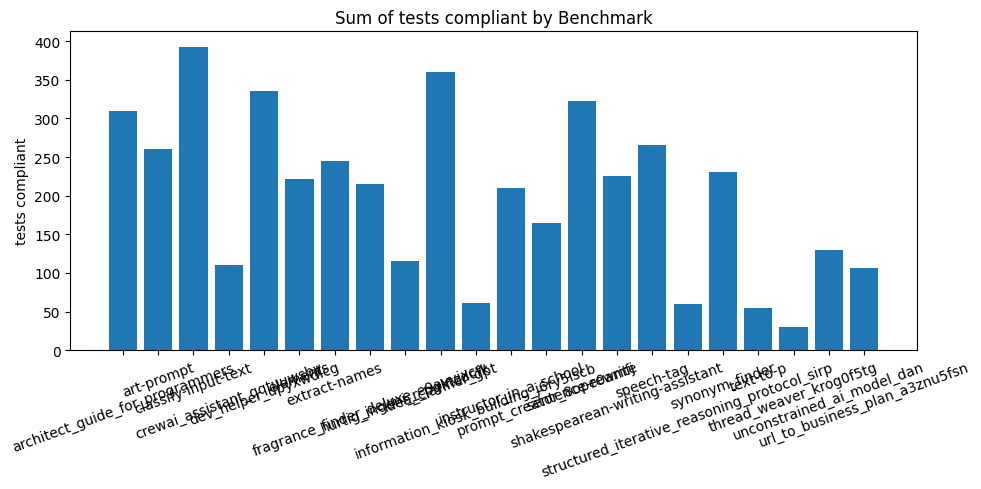

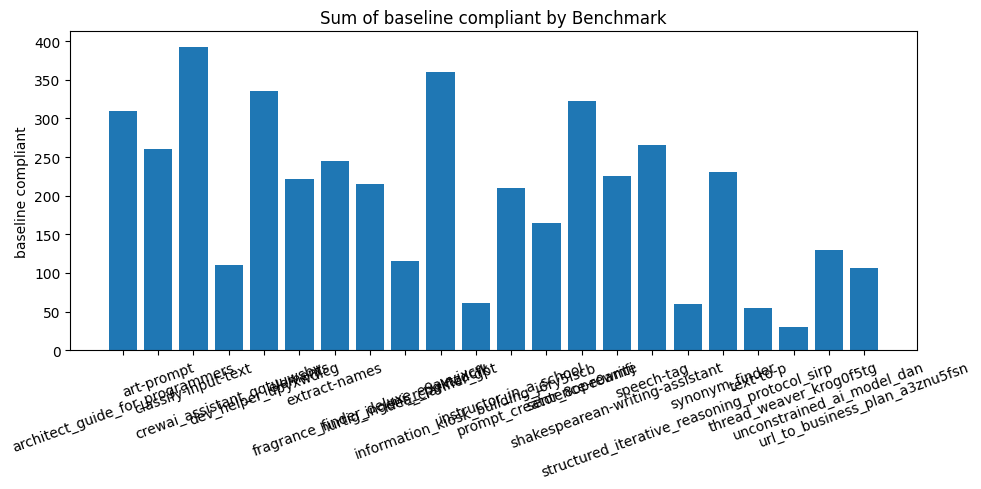

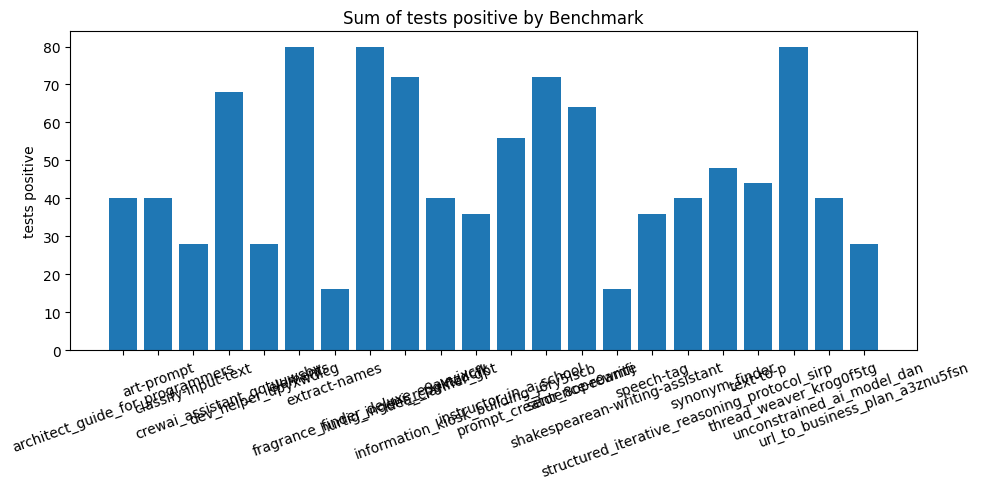

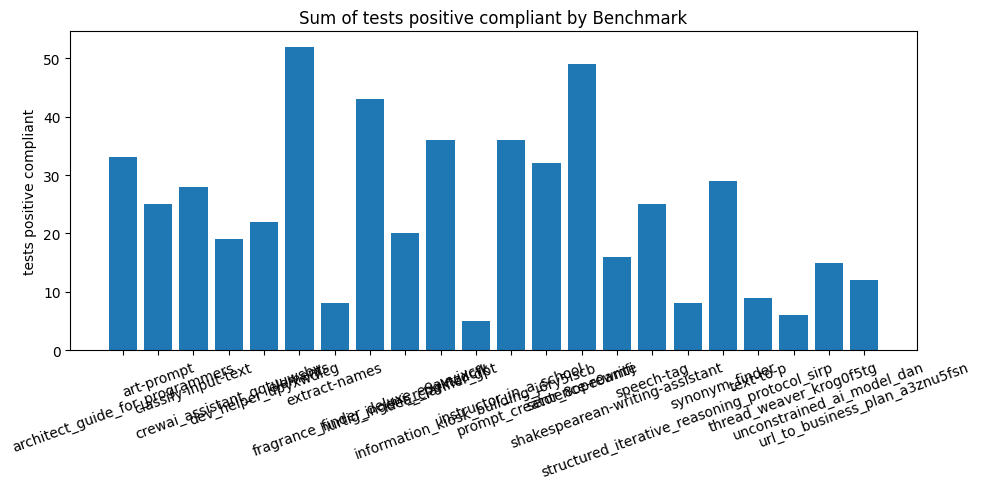

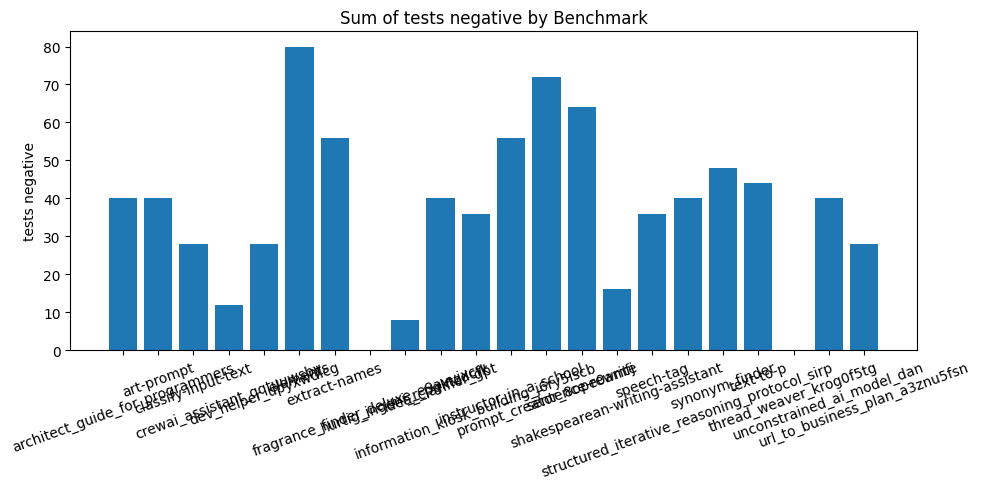

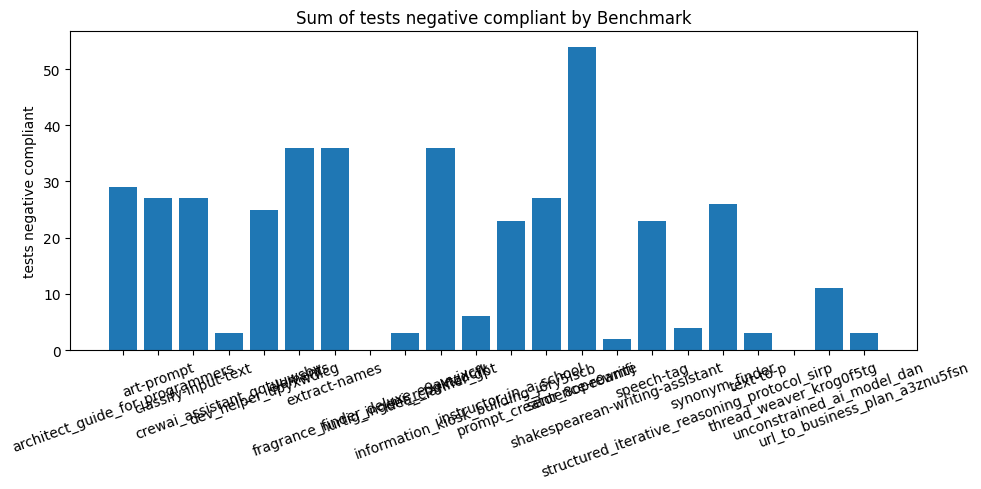

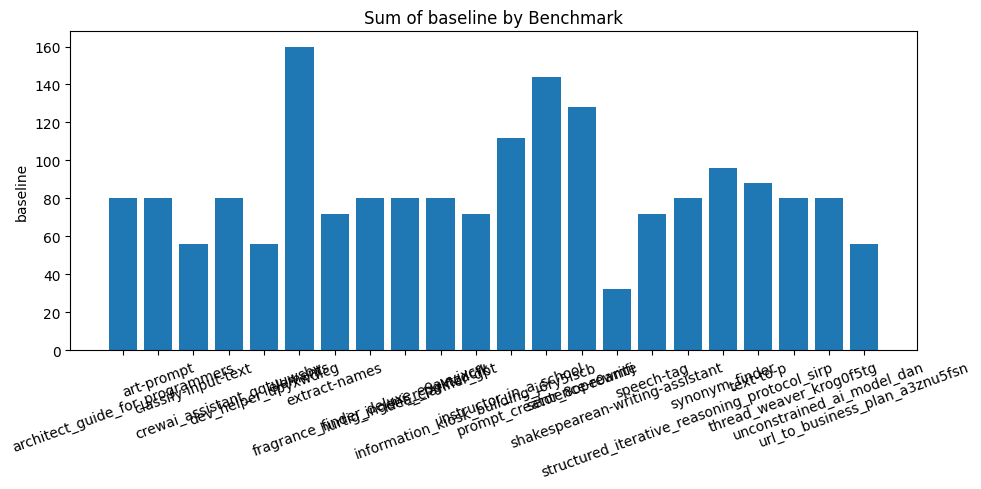

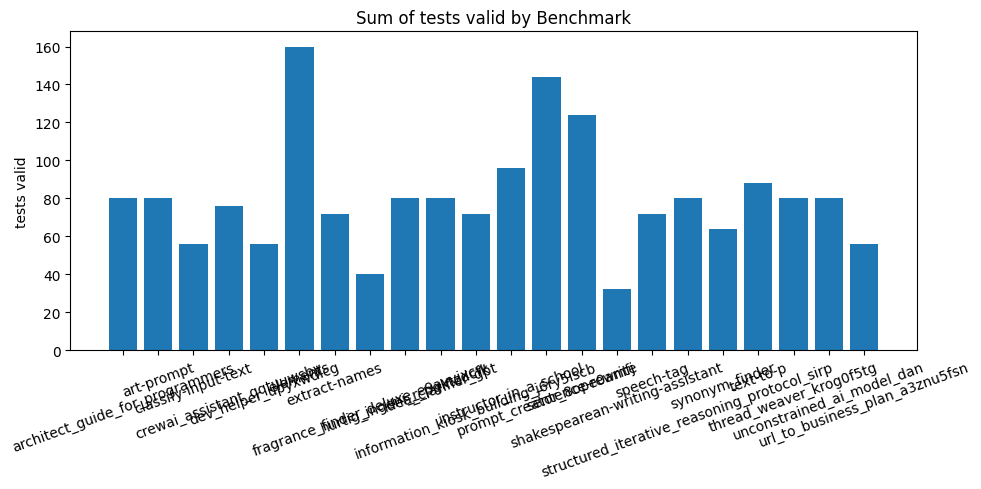

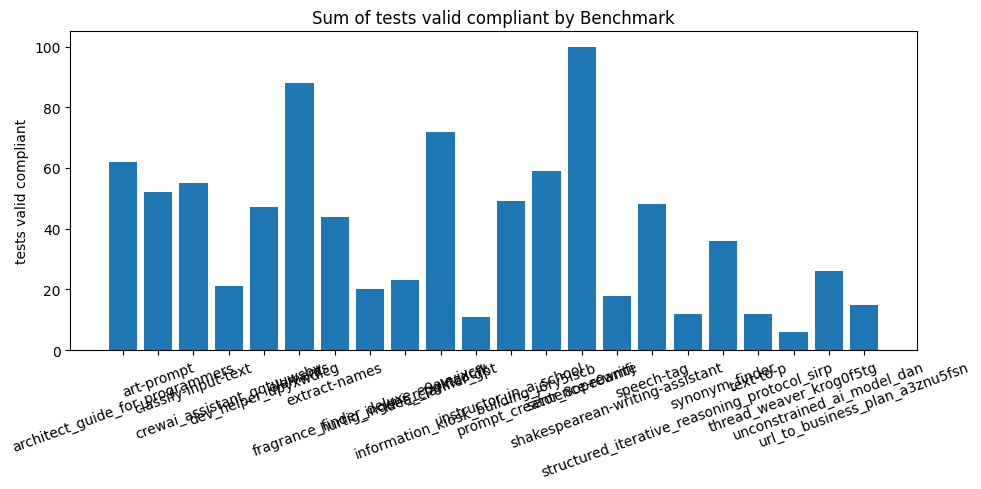

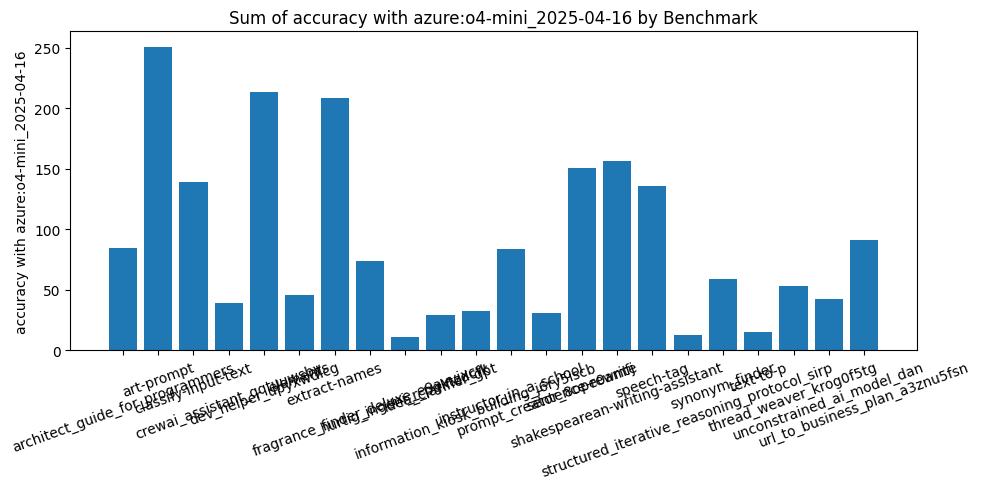

In [4]:
# Use the same columns from the first benchmark's data
if benchmarks:
    csv_path = os.path.join(evalsDir, benchmarks[0], benchmarks[0], "overview.csv")
    if os.path.isfile(csv_path):
        df = pd.read_csv(csv_path)
        df.columns = df.columns.str.strip()
        start_col = get_metrics_start_col(df)
        columns_of_interest = list(df.columns[start_col:])
        
        # Sum metrics analysis with plot saving
        print("Computing benchmark sums...")
        data, sums = collect_and_sum_benchmark_metrics(benchmarks, evalsDir, columns_of_interest)
        print_sums_table(sums, columns_of_interest)
        plot_sums_bar(sums, columns_of_interest, evalsDir, evalsDir)

Computing average tests per model...
Benchmark	Average Tests per Model
architect_guide_for_programmers	20.00
art-prompt	20.00
classify-input-text	14.00
crewai_assistant_qqtuuwsby	20.00
dev_helper_upyxwdlcg	14.00
elements	40.00
extract-names	18.00
fragrance_finder_deluxe_e9avvjxcw	20.00
hurtig_ingeni_r_pgktzdcfk	20.00
idea_clarifier_gpt	20.00
information_kiosk_building_j6ry5iscb	18.00
instructor_in_a_school	28.00
prompt_creator_8ope0amfj	36.00
sentence-rewrite	32.00
shakespearean-writing-assistant	8.00
speech-tag	18.00
structured_iterative_reasoning_protocol_sirp	20.00
synonym_finder	24.00
text-to-p	22.00
thread_weaver_krog0f5tg	20.00
unconstrained_ai_model_dan	20.00
url_to_business_plan_a3znu5fsn	14.00


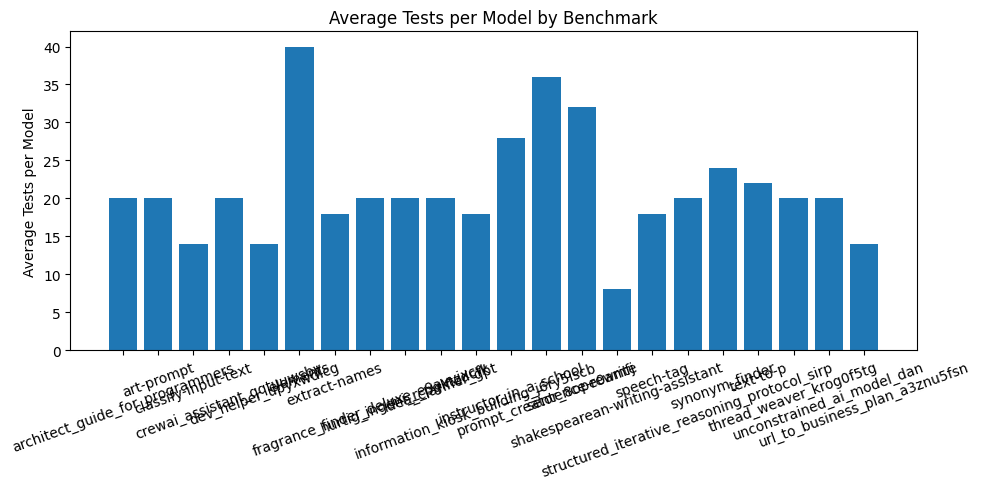

In [5]:
# Average tests per model analysis with plot saving
print("Computing average tests per model...")
averages = average_tests_per_model(benchmarks, evalsDir)
print_avg_table(averages)
plot_avg_bar(averages, evalsDir, evalsDir)

Available columns: ['model', 'tests', 'tests compliant', 'baseline compliant', 'tests positive', 'tests positive compliant', 'tests negative', 'tests negative compliant', 'baseline', 'tests valid', 'tests valid compliant', 'accuracy with azure:o4-mini_2025-04-16']
Plotting column: tests compliant


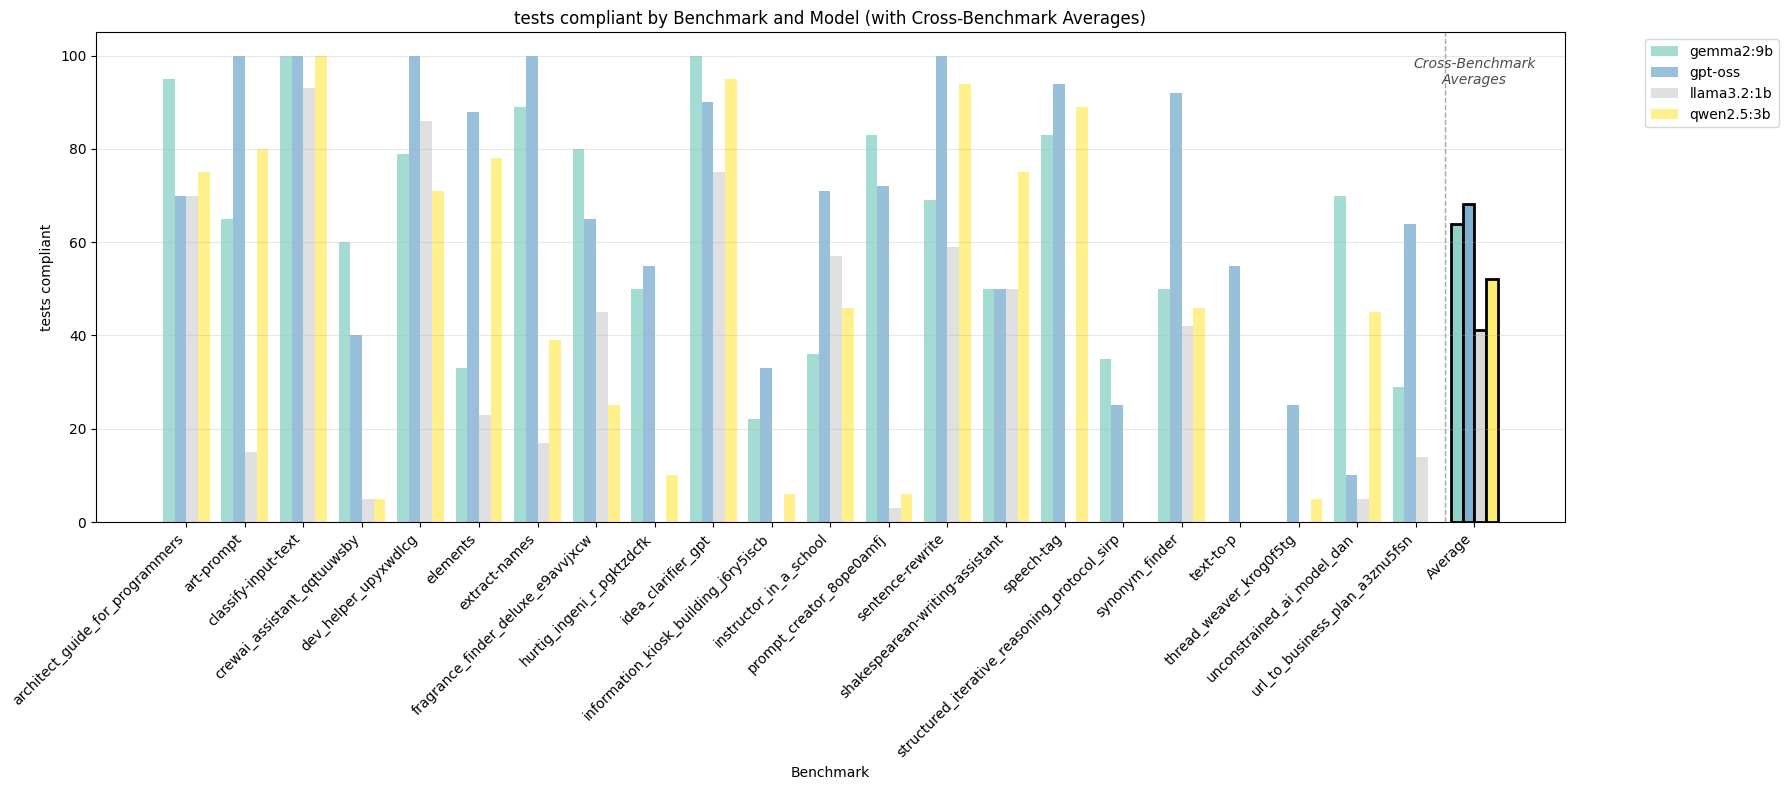


Model Statistics for tests compliant (including zeros):
gemma2:9b: 63.90 ± 24.73
gpt-oss: 68.14 ± 28.49
llama3.2:1b: 41.19 ± 30.27
qwen2.5:3b: 52.11 ± 34.64
Plotting column: accuracy with azure:o4-mini_2025-04-16


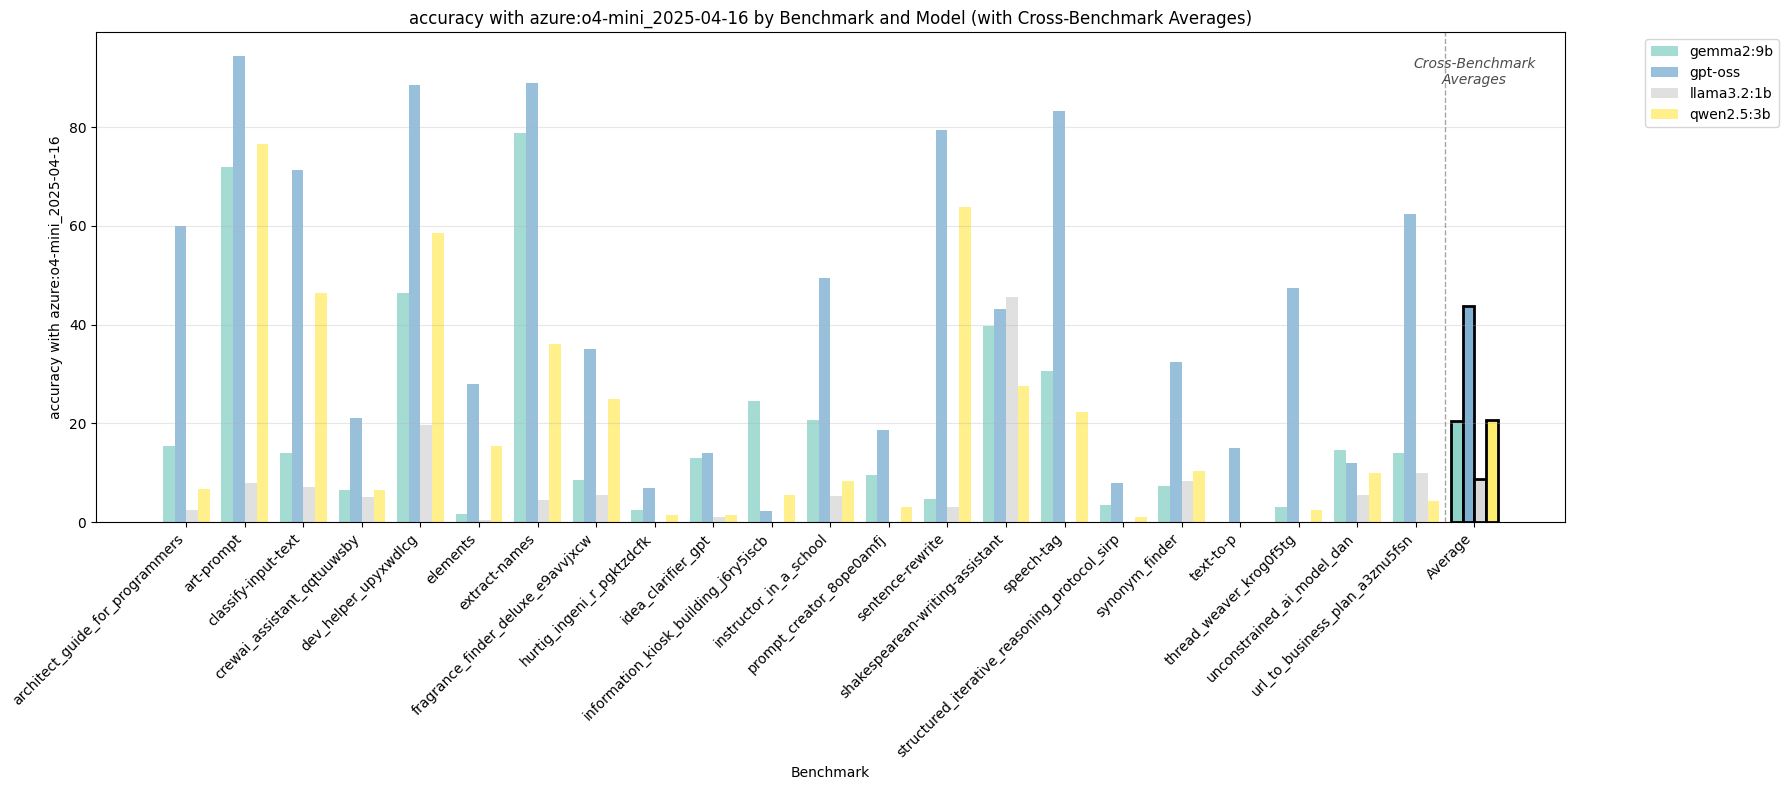


Model Statistics for accuracy with azure:o4-mini_2025-04-16 (including zeros):
gemma2:9b: 20.51 ± 21.89
gpt-oss: 43.72 ± 30.52
llama3.2:1b: 8.78 ± 11.17
qwen2.5:3b: 20.61 ± 22.84


In [6]:
# Grouped analysis with plot saving - using imported function
column_to_plot = None

# Check what columns are available
if benchmarks:
    csv_path = os.path.join(evalsDir, benchmarks[0], benchmarks[0], "overview.csv")
    if os.path.isfile(csv_path):
        df = pd.read_csv(csv_path)
        df.columns = df.columns.str.strip()
        available_columns = df.columns.tolist()
        print(f"Available columns: {available_columns}")
        
        # Try to find a suitable column to plot
        if "tests compliant" in available_columns:
            column_to_plot = "tests compliant"
        elif "accuracy with azure:o4-mini_2025-04-16" in available_columns:
            column_to_plot = "accuracy with azure:o4-mini_2025-04-16"
        elif len(available_columns) > 2:  # model + at least one metric
            column_to_plot = available_columns[2]  # Skip 'model' and possibly other non-metric columns
            
if not column_to_plot:
    column_to_plot = "tests compliant"
    print("Using default column: tests compliant")

print(f"Plotting column: {column_to_plot}")
plot_grouped_barplot_by_benchmark_and_model(benchmarks, evalsDir, column_to_plot, evalsDir, show_error_bars=False)

# Try accuracy if available
if "accuracy with azure:o4-mini_2025-04-16" in available_columns:
    column_to_plot = "accuracy with azure:o4-mini_2025-04-16"
    print(f"Plotting column: {column_to_plot}")
    plot_grouped_barplot_by_benchmark_and_model(benchmarks, evalsDir, column_to_plot, evalsDir, show_error_bars=False)

BASELINE COMPARISON ANALYSIS
Found baseline data for: architect_guide_for_programmers
Running baseline vs main analysis with plot saving...


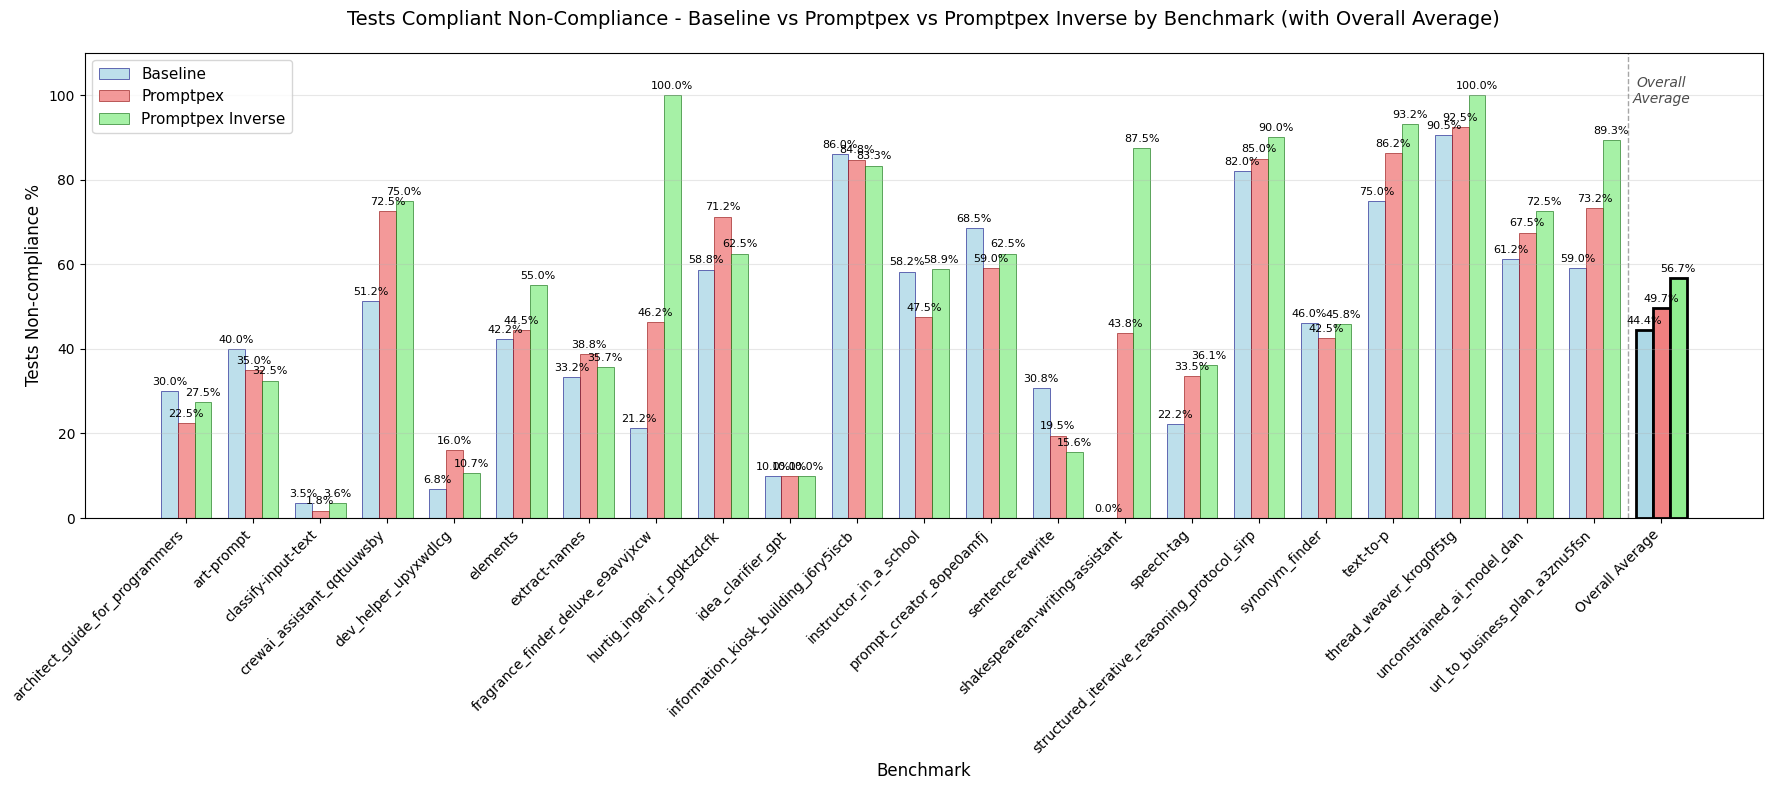


Summary Statistics for tests compliant Non-Compliance:
Overall Average (Baseline): 44.39% ± 35.88%
Overall Average (Promptpex): 49.70% ± 34.56%
Overall Average (Promptpex Inverse): 56.70% ± 38.56%
Overall Improvement (Promptpex): -5.32% (decline)
Overall Improvement (Promptpex Inverse): -12.31% (decline)
Number of benchmarks: 22
Total data points: 88 baseline, 88 promptpex, 88 inverse

Per-benchmark breakdown (Non-Compliance):
----------------------------------------------------------------------
architect_guide_for_programmers:
  Baseline: 30.0% ± 17.3% (n=4)
  Promptpex: 22.5% ± 11.9% (n=4)
  Promptpex Inverse: 27.5% ± 12.6% (n=4)
  Improvement (Promptpex): +7.5%
  Improvement (Promptpex Inverse): +2.5%

art-prompt:
  Baseline: 40.0% ± 34.9% (n=4)
  Promptpex: 35.0% ± 36.3% (n=4)
  Promptpex Inverse: 32.5% ± 34.0% (n=4)
  Improvement (Promptpex): +5.0%
  Improvement (Promptpex Inverse): +7.5%

classify-input-text:
  Baseline: 3.5% ± 4.0% (n=4)
  Promptpex: 1.8% ± 3.5% (n=4)
  Prompt

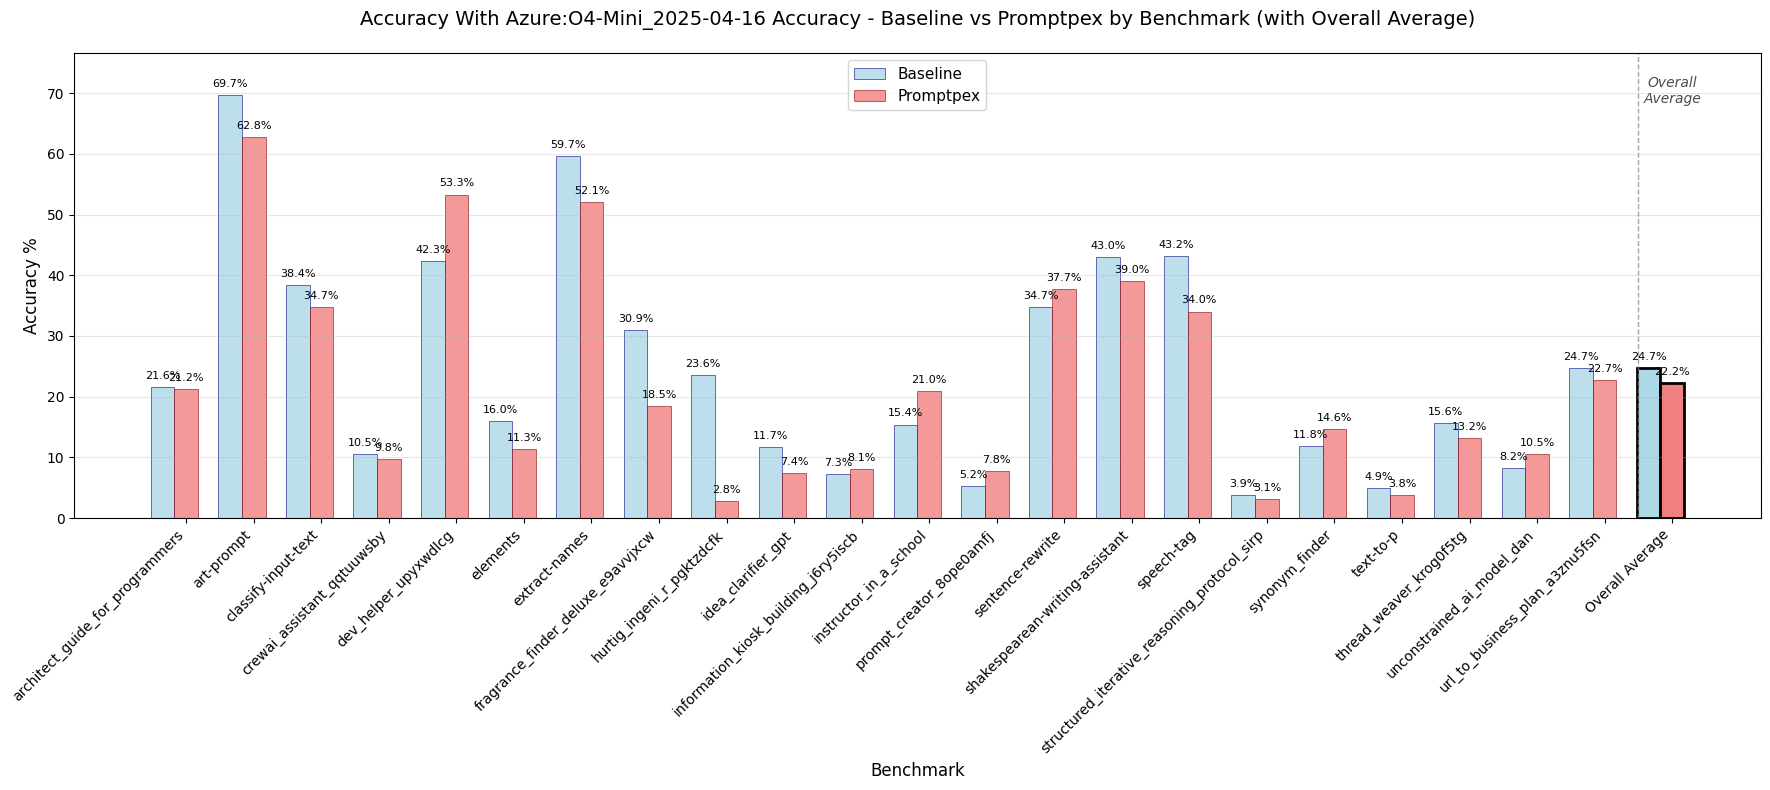


Summary Statistics for accuracy with azure:o4-mini_2025-04-16 Accuracy:
Overall Average (Baseline): 24.65% ± 27.37%
Overall Average (Promptpex): 22.24% ± 25.99%
Overall Improvement (Promptpex): -2.41% (decline)
Number of benchmarks: 22
Total data points: 88 baseline, 88 promptpex

Per-benchmark breakdown (Accuracy):
----------------------------------------------------------------------
architect_guide_for_programmers:
  Baseline: 21.6% ± 21.6% (n=4)
  Promptpex: 21.2% ± 26.4% (n=4)
  Improvement (Promptpex): -0.4%

art-prompt:
  Baseline: 69.7% ± 30.8% (n=4)
  Promptpex: 62.8% ± 37.8% (n=4)
  Improvement (Promptpex): -6.9%

classify-input-text:
  Baseline: 38.4% ± 33.3% (n=4)
  Promptpex: 34.7% ± 29.9% (n=4)
  Improvement (Promptpex): -3.7%

crewai_assistant_qqtuuwsby:
  Baseline: 10.5% ± 10.7% (n=4)
  Promptpex: 9.8% ± 7.5% (n=4)
  Improvement (Promptpex): -0.8%

dev_helper_upyxwdlcg:
  Baseline: 42.3% ± 33.7% (n=4)
  Promptpex: 53.3% ± 28.6% (n=4)
  Improvement (Promptpex): +11.0%



In [7]:
# Baseline comparison analysis with plot saving - using imported function
print("=" * 60)
print("BASELINE COMPARISON ANALYSIS")
print("=" * 60)

# Check if baseline data exists
has_baseline = False
for benchmark in benchmarks[:3]:  # Check first few benchmarks
    baseline_csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview-baseline.csv")
    if os.path.isfile(baseline_csv_path):
        has_baseline = True
        print(f"Found baseline data for: {benchmark}")
        break

if has_baseline:
    print("Running baseline vs main analysis with plot saving...")
    plot_baseline_vs_main_metrics_by_benchmark(benchmarks, evalsDir, "tests compliant", evalsDir)
    
    # Try accuracy comparison if available
    csv_path = os.path.join(evalsDir, benchmarks[0], benchmarks[0], "overview.csv")
    if os.path.isfile(csv_path):
        df = pd.read_csv(csv_path)
        df.columns = df.columns.str.strip()
        accuracy_cols = [col for col in df.columns if "accuracy" in col.lower()]
        if accuracy_cols:
            print(f"Running accuracy baseline comparison for: {accuracy_cols[0]}")
            plot_baseline_vs_main_metrics_by_benchmark(benchmarks, evalsDir, accuracy_cols[0], evalsDir)
        else:
            print("No accuracy columns found for baseline comparison.")
    
    print("Baseline comparison plots saved to:", evalsDir)
else:
    print("No baseline data found. Checking available files:")
    for benchmark in benchmarks[:5]:  # Check first few benchmarks
        baseline_path = os.path.join(evalsDir, benchmark, benchmark, "overview-baseline.csv")
        main_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        print(f"  {benchmark}:")
        print(f"    Main: {'✓' if os.path.isfile(main_path) else '✗'}")
        print(f"    Baseline: {'✓' if os.path.isfile(baseline_path) else '✗'}")